# Walmart Trip Type Classification

https://www.kaggle.com/c/walmart-recruiting-trip-type-classification

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
df = pd.read_csv('train.csv')

In [58]:
df.head(2)

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,999,5,Friday,6.811315e+10,-1,FINANCIAL SERVICES,1000.0
1,30,7,Friday,6.053882e+10,1,SHOES,8931.0


VisitNumber - an id corresponding to a single trip by a single customer

Weekday - the weekday of the trip

Upc - the UPC number of the product purchased

ScanCount - the number of the given item that was purchased. A negative value indicates a product return.

DepartmentDescription - a high-level description of the item's department

FinelineNumber - a more refined category for each of the products, created by Walmart

# Data cleaning and first look

In [59]:
df.describe()

,TripType,VisitNumber,Upc,ScanCount,FinelineNumber
count,647054.000000,647054.000000,6.429250e+05,647054.000000,642925.000000
mean,58.584511,96167.640078,3.060698e+10,1.108878,3726.884567
std,157.635533,55545.485154,9.120134e+10,0.700776,2780.966158
min,3.000000,5.000000,8.340000e+02,-12.000000,0.000000
25%,27.000000,49268.000000,3.400001e+09,1.000000,1404.000000
50%,39.000000,97074.000000,7.050103e+09,1.000000,3352.000000
75%,40.000000,144316.000000,3.006531e+10,1.000000,5501.000000
max,999.000000,191347.000000,9.789707e+11,71.000000,9998.000000


In [60]:
df.dtypes

TripType                   int64
VisitNumber                int64
Weekday                   object
Upc                      float64
ScanCount                  int64
DepartmentDescription     object
FinelineNumber           float64
dtype: object

Since TripType has no numeric value i'll change them to string

In [61]:
df['TripType'] = df.TripType.astype(str)

In [62]:
df.dtypes

TripType                  object
VisitNumber                int64
Weekday                   object
Upc                      float64
ScanCount                  int64
DepartmentDescription     object
FinelineNumber           float64
dtype: object

In [63]:
df.nunique()

TripType                    38
VisitNumber              95674
Weekday                      7
Upc                      97714
ScanCount                   39
DepartmentDescription       68
FinelineNumber            5195
dtype: int64

37 trip types and 1 'other' no missing values.

In [64]:
df.isna().sum()

TripType                    0
VisitNumber                 0
Weekday                     0
Upc                      4129
ScanCount                   0
DepartmentDescription    1361
FinelineNumber           4129
dtype: int64

There are nulls only in Upc , Department , and Fineline all are possible for nulls so i'll use 0 instead

In [65]:
df.fillna(value='0',inplace=True)

In [66]:
df.isna().sum()

TripType                 0
VisitNumber              0
Weekday                  0
Upc                      0
ScanCount                0
DepartmentDescription    0
FinelineNumber           0
dtype: int64

In [67]:
df.DepartmentDescription.unique()

array(['FINANCIAL SERVICES', 'SHOES', 'PERSONAL CARE',
       'PAINT AND ACCESSORIES', 'DSD GROCERY', 'MEAT - FRESH & FROZEN',
       'DAIRY', 'PETS AND SUPPLIES', 'HOUSEHOLD CHEMICALS/SUPP', '0',
       'IMPULSE MERCHANDISE', 'PRODUCE', 'CANDY, TOBACCO, COOKIES',
       'GROCERY DRY GOODS', 'BOYS WEAR', 'FABRICS AND CRAFTS',
       'JEWELRY AND SUNGLASSES', 'MENS WEAR', 'ACCESSORIES',
       'HOME MANAGEMENT', 'FROZEN FOODS', 'SERVICE DELI',
       'INFANT CONSUMABLE HARDLINES', 'PRE PACKED DELI', 'COOK AND DINE',
       'PHARMACY OTC', 'LADIESWEAR', 'COMM BREAD', 'BAKERY',
       'HOUSEHOLD PAPER GOODS', 'CELEBRATION', 'HARDWARE', 'BEAUTY',
       'AUTOMOTIVE', 'BOOKS AND MAGAZINES', 'SEAFOOD', 'OFFICE SUPPLIES',
       'LAWN AND GARDEN', 'SHEER HOSIERY', 'WIRELESS', 'BEDDING',
       'BATH AND SHOWER', 'HORTICULTURE AND ACCESS', 'HOME DECOR', 'TOYS',
       'INFANT APPAREL', 'LADIES SOCKS', 'PLUS AND MATERNITY',
       'ELECTRONICS', 'GIRLS WEAR, 4-6X  AND 7-14', 'BRAS & SHAPEWEAR',

There is an 'Other Departments' category, i don't want to insert another 'other' so i'll leave it for now 

# EDA

<Container object of 38 artists>

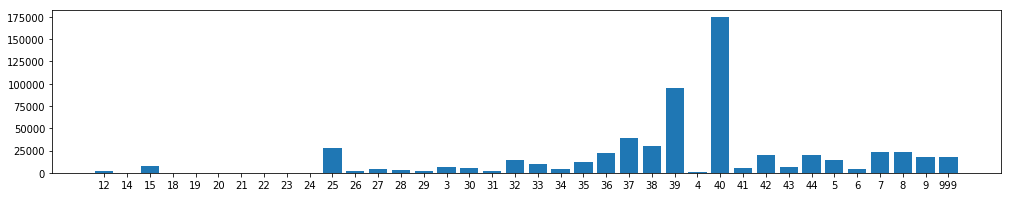

In [68]:
trip_group_count = df[['TripType','VisitNumber']].groupby(['TripType']).count()
plt.subplots(figsize=(17,3))
plt.bar(trip_group_count.index , trip_group_count.VisitNumber)

Trip types 40 39 37 38 25 are the most common ones, 7 8 9 999 after that.

<Container object of 38 artists>

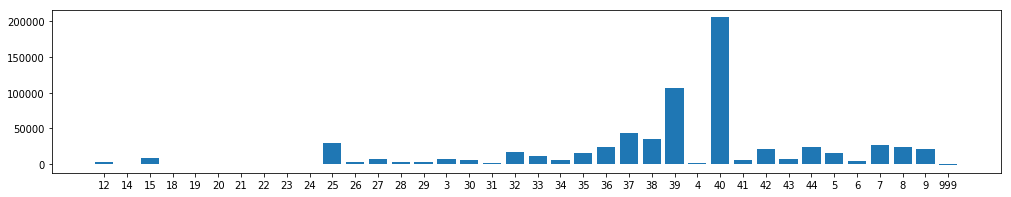

In [69]:
trip_group_scan_sum = df[['TripType','VisitNumber','ScanCount']].groupby(['TripType']).sum()
plt.subplots(figsize=(17,3))
plt.bar(trip_group_scan_sum.index , trip_group_scan_sum.ScanCount)

In [70]:
trip_group_scan_sum.loc['999']

VisitNumber    1693615000
ScanCount           -1776
Name: 999, dtype: int64

No difference when looking at sum of items purchased , only category 999 reduced which is more related to returns

In [71]:
(df.ScanCount < 0).sum()/647054

0.023889814451344093

2% of total scan are return , sounds reasonable.

I'd like to continue and look at the departments for each trip

In [72]:
grouped_department = pd.DataFrame(df[['TripType','DepartmentDescription','ScanCount']]
                                  .groupby(['TripType','DepartmentDescription']).sum())

In [73]:
table = pd.pivot_table(grouped_department, index=['DepartmentDescription'], columns='TripType'
                       , aggfunc=np.sum , fill_value=0)

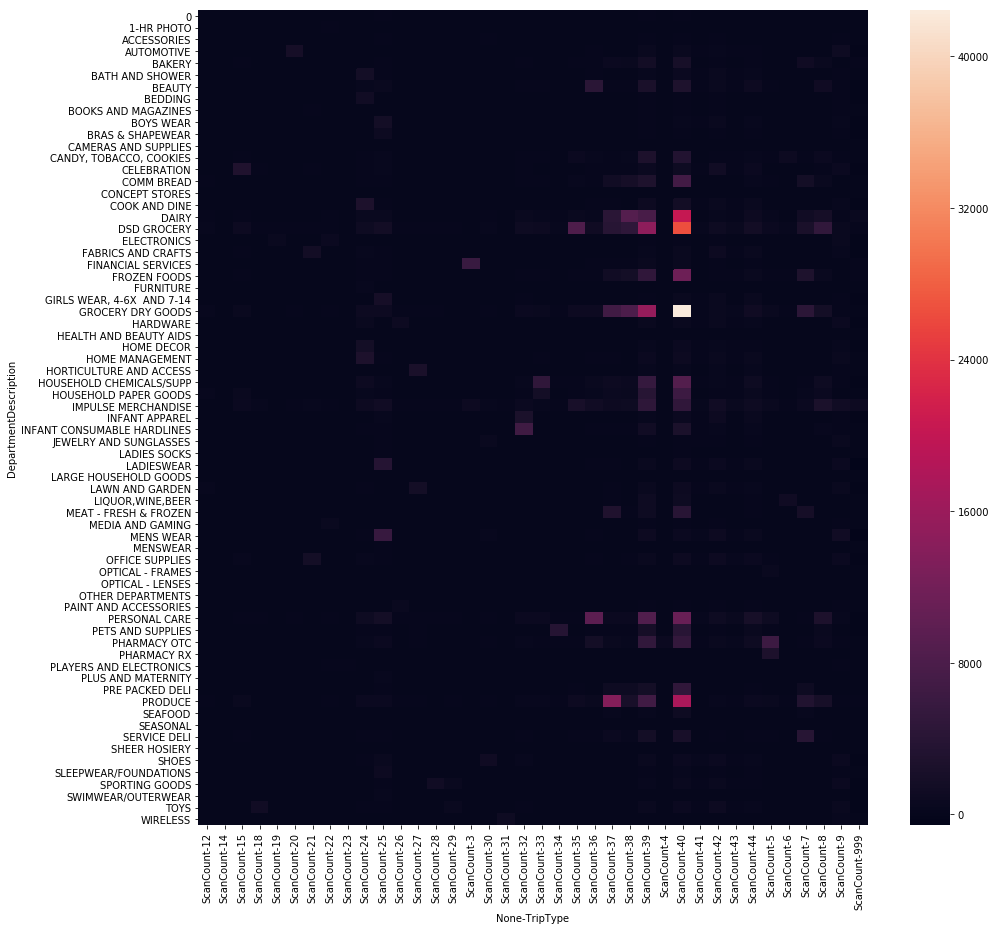

In [74]:
plt.subplots(figsize=(15,15))
sns.heatmap(pd.DataFrame(table))

Trip type # 40 is highly affecting the map because it has the most amount of purchases. 
We can see that trip 40 is probably the 'Normal' shopping as it mostly includes day to day items from departments 'Grocery dry goods' 'Dairy' & 'Grocery'.
Trip 39 has also a very similar behaviour,
And trip 37 is highly correlated with 'Produce'
I'll look in the data without these 3.

In [75]:
m = (~df.TripType.isin(['40','39','37']))

In [76]:
Filtered_data = df[m]

In [77]:
grouped_department2 = pd.DataFrame(Filtered_data[['TripType','DepartmentDescription','ScanCount']]
                                  .groupby(['TripType','DepartmentDescription']).sum())

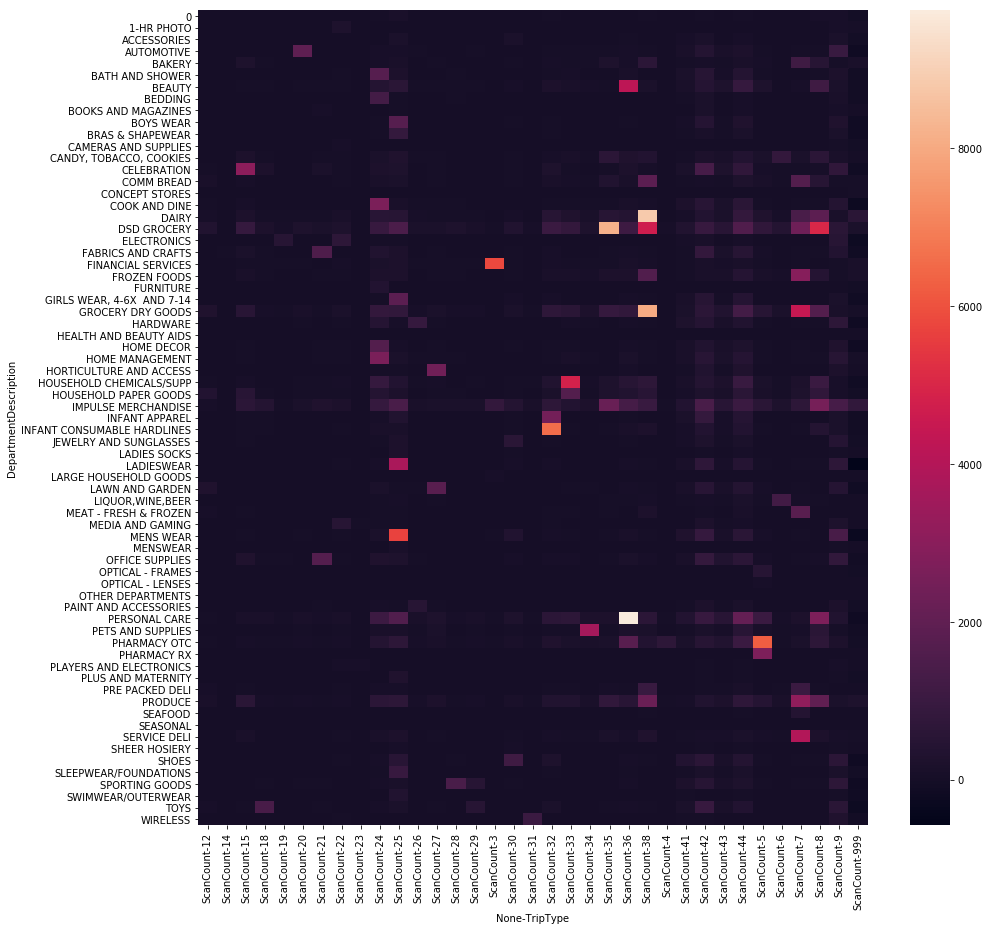

In [78]:
table2 = pd.pivot_table(grouped_department2, index=['DepartmentDescription'], columns='TripType', aggfunc=np.sum 
                        , fill_value=0)
plt.subplots(figsize=(15,15))
sns.heatmap(pd.DataFrame(table2))

Trip 36 is 'Personal beauty' and 'Health care', 5 - 'Pharmacy' ,  25 - cloths, 3 - 'Financial services', 18 - 'Toys', 34 - 'Pets and supplies' , 28 'Sporting goods'

Now to prepare the data for clustering before starting to predict, TripType is unique for each customer and in its current status the data does not show it.

In [79]:
df.nunique()

TripType                    38
VisitNumber              95674
Weekday                      7
Upc                      97715
ScanCount                   39
DepartmentDescription       69
FinelineNumber            5196
dtype: int64

# Preparing the data fo modeling

UPC has 97k unique values and will not fit in the model as it requires 97k dummies and due to its high unique count probably has very low prediction power.

Due to the above i want to create grouped data by visit, day, and department to predict the trip type , i'll first use clustering. 

In [80]:
df['TripType'] = df.TripType.astype(int)

In [81]:
df_filtered = df.drop(['FinelineNumber','Upc'],axis=1)

In [82]:
df_filtered.columns

Index(['TripType', 'VisitNumber', 'Weekday', 'ScanCount',
       'DepartmentDescription'],
      dtype='object')

In [83]:
df_filtered.dtypes

TripType                  int32
VisitNumber               int64
Weekday                  object
ScanCount                 int64
DepartmentDescription    object
dtype: object

In [129]:
df_filtered_grouped = pd.DataFrame(df[['VisitNumber', 'TripType', 'Weekday', 'ScanCount','DepartmentDescription']]
                                  .groupby(['VisitNumber', 'TripType', 'Weekday','DepartmentDescription']).sum())

In [130]:
df_filtered_grouped.head(2)

,,,,ScanCount
VisitNumber,TripType,Weekday,DepartmentDescription,
5,999,Friday,FINANCIAL SERVICES,-1
7,30,Friday,PERSONAL CARE,1


In [91]:
df_filtered.dtypes

TripType                  int32
VisitNumber               int64
Weekday                  object
ScanCount                 int64
DepartmentDescription    object
dtype: object

In [257]:
km_table = pd.pivot_table(df_filtered_grouped, index=[df_filtered_grouped.index.get_level_values(0), 
                                 df_filtered_grouped.index.get_level_values(2),
                                 df_filtered_grouped.index.get_level_values(1)], 
                          columns=[df_filtered_grouped.index.get_level_values(3)]
                          ,aggfunc=np.sum , fill_value=0)

In [258]:
# Also an option for the above, a bit easier as well
# df_filtered_grouped2 = pd.DataFrame(df[['VisitNumber', 'TripType', 'Weekday', 'ScanCount','DepartmentDescription']]
#                                   .groupby(['VisitNumber', 'TripType', 'Weekday','DepartmentDescription'])
#                                    .sum().unstack(fill_value=0))

In [259]:
# Reseting from multi index to one index col
km_table.reset_index(level=[1], inplace=True)

In [260]:
km_table.head(2)

Weekday ScanCount                                    \
DepartmentDescription                 0 1-HR PHOTO ACCESSORIES AUTOMOTIVE   
VisitNumber TripType                                                        
5           999        Friday         0          0           0          0   
7           30         Friday         0          0           0          0   

                                                             \
DepartmentDescription BAKERY BATH AND SHOWER BEAUTY BEDDING   
VisitNumber TripType                                          
5           999            0               0      0       0   
7           30             0               0      0       0   

                                            ...                      \
DepartmentDescription BOOKS AND MAGAZINES   ...    SEAFOOD SEASONAL   
VisitNumber TripType                        ...                       
5           999                         0   ...          0        0   
7           30                          0   ...          0        0   

                                                                              \
DepartmentDescription SERVICE DELI SHEER HOSIERY SHOES SLEEPWEAR/FOUNDATIONS   
VisitNumber TripType                                                           
5           999                  0             0     0                     0   
7           30                   0             0     1                     0   

                                                                       
DepartmentDescription SPORTING GOODS SWIMWEAR/OUTERWEAR TOYS WIRELESS  
VisitNumber TripType                                                   
5           999                    0                  0    0        0  
7           30                     0                  0    0        0  

[2 rows x 70 columns]

In [261]:
# Flattening the multi index
km_table.columns = km_table.columns.to_series().str.join('_')

In [262]:
km_table.head(2)

,,Weekday_,ScanCount_0,ScanCount_1-HR PHOTO,ScanCount_ACCESSORIES,ScanCount_AUTOMOTIVE,ScanCount_BAKERY,ScanCount_BATH AND SHOWER,ScanCount_BEAUTY,ScanCount_BEDDING,ScanCount_BOOKS AND MAGAZINES,...,ScanCount_SEAFOOD,ScanCount_SEASONAL,ScanCount_SERVICE DELI,ScanCount_SHEER HOSIERY,ScanCount_SHOES,ScanCount_SLEEPWEAR/FOUNDATIONS,ScanCount_SPORTING GOODS,ScanCount_SWIMWEAR/OUTERWEAR,ScanCount_TOYS,ScanCount_WIRELESS
VisitNumber,TripType,,,,,,,,,,,,,,,,,,,,,
5,999,Friday,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,30,Friday,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [263]:
# Reseting from multi index to one index col
km_table.reset_index(level=[1], inplace=True)

In [264]:
km_table.head(2)

,TripType,Weekday_,ScanCount_0,ScanCount_1-HR PHOTO,ScanCount_ACCESSORIES,ScanCount_AUTOMOTIVE,ScanCount_BAKERY,ScanCount_BATH AND SHOWER,ScanCount_BEAUTY,ScanCount_BEDDING,...,ScanCount_SEAFOOD,ScanCount_SEASONAL,ScanCount_SERVICE DELI,ScanCount_SHEER HOSIERY,ScanCount_SHOES,ScanCount_SLEEPWEAR/FOUNDATIONS,ScanCount_SPORTING GOODS,ScanCount_SWIMWEAR/OUTERWEAR,ScanCount_TOYS,ScanCount_WIRELESS
VisitNumber,,,,,,,,,,,,,,,,,,,,,
5,999,Friday,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,30,Friday,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


Now to change triptype and weekday with label encoder

In [265]:
le1 = LabelEncoder()
le2 = LabelEncoder()

In [266]:
le_trip =    le1.fit(km_table.TripType)
le_weekday = le2.fit(km_table.Weekday_)

In [267]:
km_table['TripType'] = le_trip.transform(km_table.TripType)
km_table['Weekday_'] = le_weekday.transform(km_table.Weekday_)

In [268]:
km_table.head(2)

,TripType,Weekday_,ScanCount_0,ScanCount_1-HR PHOTO,ScanCount_ACCESSORIES,ScanCount_AUTOMOTIVE,ScanCount_BAKERY,ScanCount_BATH AND SHOWER,ScanCount_BEAUTY,ScanCount_BEDDING,...,ScanCount_SEAFOOD,ScanCount_SEASONAL,ScanCount_SERVICE DELI,ScanCount_SHEER HOSIERY,ScanCount_SHOES,ScanCount_SLEEPWEAR/FOUNDATIONS,ScanCount_SPORTING GOODS,ScanCount_SWIMWEAR/OUTERWEAR,ScanCount_TOYS,ScanCount_WIRELESS
VisitNumber,,,,,,,,,,,,,,,,,,,,,
5,37,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


Data is ready

# Clustering

In [255]:
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.cluster import KMeans

By the kmeans and the elbow method i'd like to improve the model's future prediction and find how many clusters i can find , altough i know there are 38 groups, i don't expect to find so many as some of thje trip types are very similar

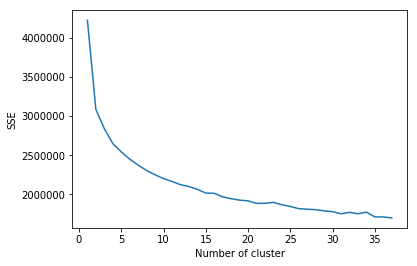

In [289]:
sse = {}
for i in range(1,38):
    km = KMeans(n_clusters=i)
    km_table['cluster'] = km.fit_predict(km_table.drop('TripType', axis=1))
    sse[i] = km.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()    

looks like the 'elbow' is somewhere between 10 to 15

In [290]:
km = KMeans(n_clusters=13)
km_table['cluster'] = km.fit_predict(km_table.drop('TripType', axis=1))
km_table.head()

,TripType,Weekday_,ScanCount_0,ScanCount_1-HR PHOTO,ScanCount_ACCESSORIES,ScanCount_AUTOMOTIVE,ScanCount_BAKERY,ScanCount_BATH AND SHOWER,ScanCount_BEAUTY,ScanCount_BEDDING,...,ScanCount_SEASONAL,ScanCount_SERVICE DELI,ScanCount_SHEER HOSIERY,ScanCount_SHOES,ScanCount_SLEEPWEAR/FOUNDATIONS,ScanCount_SPORTING GOODS,ScanCount_SWIMWEAR/OUTERWEAR,ScanCount_TOYS,ScanCount_WIRELESS,cluster
VisitNumber,,,,,,,,,,,,,,,,,,,,,
5,37,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,22,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,18,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
9,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


# Modeling

In [292]:
import keras
from keras.models import Sequential
from keras.layers import Dropout , Dense

In [297]:
from sklearn.model_selection import train_test_split 

In [350]:
from sklearn.preprocessing import RobustScaler , StandardScaler, MinMaxScaler

I've label encodeded weekday before but now i dont think it was the correct thing to do as i need to chnge it to dummies, ill revert and change. I also need to change the clusters to dummies

In [317]:
km_table['Weekday_'] = le_weekday.inverse_transform(km_table.Weekday_)

In [380]:
km_table['cluster'] = km_table.cluster.astype(str)

In [381]:
km_table = pd.get_dummies(km_table)

In [473]:
X = km_table.drop('TripType', axis=1)
y = km_table.TripType

https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#results - Scalers types

In [385]:
x_train , x_test , y_train , y_test = train_test_split(X, y , test_size = 0.2)

In [498]:
rs = MinMaxScaler()

In [499]:
# x_train.iloc[:,0:69].columns

Used several scalers, minmax had the best results which makes sense

Scaling the deaprtments count wihtout scaling the dummies days and clusters

In [500]:
scaler = rs.fit(x_train.iloc[:,0:69])

In [501]:
x_train.iloc[:,0:69] = scaler.transform(x_train.iloc[:,0:69])

In [502]:
x_train.head(3)

,ScanCount_0,ScanCount_1-HR PHOTO,ScanCount_ACCESSORIES,ScanCount_AUTOMOTIVE,ScanCount_BAKERY,ScanCount_BATH AND SHOWER,ScanCount_BEAUTY,ScanCount_BEDDING,ScanCount_BOOKS AND MAGAZINES,ScanCount_BOYS WEAR,...,cluster_11,cluster_12,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9
VisitNumber,,,,,,,,,,,,,,,,,,,,,
122976,0.307692,0.142857,0.090909,0.363636,0.114286,0.069444,0.134615,0.181818,0.125,0.324324,...,0,0,0,0,0,0,0,0,0,0
71461,0.307692,0.142857,0.090909,0.363636,0.114286,0.069444,0.134615,0.181818,0.125,0.324324,...,0,0,0,0,0,0,0,1,0,0
173183,0.307692,0.142857,0.090909,0.363636,0.114286,0.069444,0.134615,0.181818,0.125,0.324324,...,0,0,0,0,0,0,0,0,0,0


In [420]:
from keras.utils.np_utils import to_categorical

In [503]:
categorical_labels = to_categorical(y_train)

In [504]:
categorical_labels

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [615]:
model = Sequential()

In [616]:
model.add(Dense(units=32, kernel_initializer='uniform', activation='relu', input_dim=89))
model.add(Dropout(rate=0.2))
model.add(Dense(units=32, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(units=32, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(units=38, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['categorical_accuracy'])

In [617]:
model.fit(x= x_train , y= categorical_labels ,epochs=150, batch_size=250 )

Epoch 1/150
76539/76539 [==============================] - 4s 49us/step - loss: 3.1520 - categorical_accuracy: 0.1123
Epoch 2/150
76539/76539 [==============================] - 2s 20us/step - loss: 3.0523 - categorical_accuracy: 0.1373
Epoch 3/150
76539/76539 [==============================] - 2s 20us/step - loss: 2.8530 - categorical_accuracy: 0.2008
Epoch 4/150
76539/76539 [==============================] - 2s 20us/step - loss: 2.7686 - categorical_accuracy: 0.2232
Epoch 5/150
76539/76539 [==============================] - 2s 20us/step - loss: 2.7138 - categorical_accuracy: 0.2343
Epoch 6/150
76539/76539 [==============================] - 2s 20us/step - loss: 2.6693 - categorical_accuracy: 0.2476
Epoch 7/150
76539/76539 [==============================] - 2s 20us/step - loss: 2.6193 - categorical_accuracy: 0.2675
Epoch 8/150
76539/76539 [==============================] - 2s 21us/step - loss: 2.5754 - categorical_accuracy: 0.2793
Epoch 9/150
76539/76539 [==============================]

76539/76539 [==============================] - 1s 19us/step - loss: 2.1923 - categorical_accuracy: 0.3841
Epoch 70/150
76539/76539 [==============================] - 1s 19us/step - loss: 2.1909 - categorical_accuracy: 0.3831
Epoch 71/150
76539/76539 [==============================] - 1s 20us/step - loss: 2.1854 - categorical_accuracy: 0.3868
Epoch 72/150
76539/76539 [==============================] - 2s 20us/step - loss: 2.1871 - categorical_accuracy: 0.3838
Epoch 73/150
76539/76539 [==============================] - 1s 19us/step - loss: 2.1820 - categorical_accuracy: 0.3876
Epoch 74/150
76539/76539 [==============================] - 2s 20us/step - loss: 2.1836 - categorical_accuracy: 0.3832
Epoch 75/150
76539/76539 [==============================] - 1s 19us/step - loss: 2.1773 - categorical_accuracy: 0.3897
Epoch 76/150
76539/76539 [==============================] - 1s 20us/step - loss: 2.1736 - categorical_accuracy: 0.3882
Epoch 77/150
76539/76539 [==============================] - 1

76539/76539 [==============================] - 1s 19us/step - loss: 2.0319 - categorical_accuracy: 0.4280
Epoch 138/150
76539/76539 [==============================] - 1s 19us/step - loss: 2.0248 - categorical_accuracy: 0.4326
Epoch 139/150
76539/76539 [==============================] - 1s 19us/step - loss: 2.0309 - categorical_accuracy: 0.4272
Epoch 140/150
76539/76539 [==============================] - 1s 20us/step - loss: 2.0237 - categorical_accuracy: 0.4319
Epoch 141/150
76539/76539 [==============================] - 1s 19us/step - loss: 2.0239 - categorical_accuracy: 0.4299
Epoch 142/150
76539/76539 [==============================] - 1s 20us/step - loss: 2.0235 - categorical_accuracy: 0.4311
Epoch 143/150
76539/76539 [==============================] - 1s 19us/step - loss: 2.0196 - categorical_accuracy: 0.4309
Epoch 144/150
76539/76539 [==============================] - 1s 19us/step - loss: 2.0157 - categorical_accuracy: 0.4328
Epoch 145/150
76539/76539 [===========================

In [448]:
from keras.metrics import categorical_accuracy

In [589]:
model.predict(x_train)

array([[8.3392197e-01, 5.0435387e-06, 6.5478228e-04, ..., 2.7639003e-04,
        9.1147103e-06, 1.5791717e-01],
       [3.4866498e-03, 4.1169515e-03, 3.6429219e-02, ..., 2.4100079e-03,
        1.5736662e-04, 2.3424821e-01],
       [2.6370911e-03, 1.1610767e-04, 9.1753388e-03, ..., 9.2519238e-04,
        1.8236632e-04, 8.0587998e-02],
       ...,
       [4.2654458e-05, 2.1443334e-06, 2.9834162e-04, ..., 3.7378818e-04,
        4.7024998e-05, 8.6641558e-02],
       [4.7442256e-03, 2.4784973e-04, 9.5867440e-03, ..., 6.0028259e-02,
        2.1919690e-02, 2.3304956e-02],
       [1.7659612e-03, 4.4406613e-04, 4.6360833e-03, ..., 2.8416438e-03,
        1.3850202e-04, 9.1133103e-02]], dtype=float32)

In [618]:
categorical_test = to_categorical(y_test)

In [619]:
loss_and_metrics = model.evaluate(x_test, categorical_test)

19135/19135 [==============================] - 1s 68us/step


In [620]:
print(loss_and_metrics)

[12.493641360222842, 0.17052521556421144]


Very low log_loss and a huge overfit , this is after a lot of changes to the functions and layers.

Random forest

In [453]:
from sklearn.ensemble import RandomForestClassifier

In [576]:
rfc = RandomForestClassifier(n_estimators=30)

In [577]:
x_train_rfc , x_test_rfc , y_train_rfc , y_test_rfc = train_test_split(X, y , test_size = 0.25)

In [578]:
rfc.fit(x_train_rfc, y_train_rfc)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [579]:
x_train_rfc['pred'] = rfc.predict(x_train_rfc)

C:\Users\ori\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [580]:
from sklearn.metrics import confusion_matrix , log_loss

In [581]:
cm = confusion_matrix(y_true=y_train_rfc, y_pred= x_train_rfc.pred)

In [582]:
print(cm)

[[2625    0    0 ...    0    0    1]
 [   0   72  171 ...    0    0    0]
 [   1    1 3334 ...    0    0    3]
 ...
 [   0    0    0 ...  664    0    0]
 [   0    0    0 ...    0  901    0]
 [ 535    0   46 ...    0    0 5122]]


In [583]:
rfc.score(X=x_test_rfc, y=y_test_rfc)

0.6226848948534638

In [584]:
rfc.predict_proba(x_test_rfc)

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.0080983 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.03333333,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.        , 0.04048195, 0.90752218, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.16860925, 0.70951675, ..., 0.        , 0.        ,
        0.0644861 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [585]:
log_loss(y_true=y_test_rfc, y_pred=rfc.predict_proba(x_test_rfc))

2.747025083005387